<a href="https://colab.research.google.com/github/catastropiyush/pen-spring-diffraction/blob/master/diffraction_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide code segments from display
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The raw code for this notebook is hidden for easier reading.
To toggle code display, click <a href="javascript:code_toggle()">here</a>.''')

# Pen Spring Diffraction Experiment
In this experiment, we illustrate the diffraction of a pen spring (a regular helix) and discuss its implications.

We will first import `numpy` to aid us in our calculations and `matplotlib` to aid us in visualisation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
%config InlineBackend.figure_format = 'retina'

def sinc(x):
    if (x != 0):
        return np.sin(np.pi * x) / (np. pi * x)
    else:
        return 1
sinc = np.vectorize(sinc)

![Experiment Setup](setup.png)
# 1. Fill in: Experiment Variables
Enter the values here to match your experimental apparatus.

1. `slitWidth` is the gap in between each individual coil of the spring. From now on, it will be referred to as the *pitch* of the spring.
2. `wavelength` is the wavelength of the laser that is emitted by the laser pointer. It is usually marked near the emitter, on a warning label.
3. `distance` is the distance between the center of the spring and the surface on which the pattern is projection upon.

Units of the values below are given in **micrometers** ($10^{-6}$ m, also refered to as the **micron**).

In [3]:
'''
slitWidth  = float(input("slitWidth: ")) #2500          # 2.5mm
wavelength = float(input("wavelength: ")) #0.650         # 650nm
distance   = float(eval(input("distance: "))) #10.3 * 10**6  # 10.3m
'''
slitWidth  = 2500          # 2.5mm
wavelength = 0.650         # 650nm
distance   = 10.3 * 10**6  # 10.3m

![Experiment Result](result.jpg)
# 2. Fill in: Experiment Results

Measure the distance from the center to the $n-$th maxima. Choose any reasonable number!

Change the variable here to match your result in **mm**. It will be plotted on the visualisation later on.

In [4]:
#result_mm = float(input("result: "))
result_mm = 25.5

# Visualising a Single-slit Diffraction
We will first set up some parameters, and then proceed to plot the intensity over distance from the center of the pattern.

In [5]:
amplitude = 5 # the power of the laser (mW) as marked on the laser point. The accuracy of this value is trivial.
x = np.arange(-50000, 50000, 10) # numerical bounds and resolution of the graph (micron)
F = sinc(slitWidth * x / wavelength / distance)
intensity = amplitude / (wavelength * distance) * (slitWidth * F)**2

### Plotting the graph
See if your result (marked by blue line) indeed corresponds to the maxima from which you measured earlier on

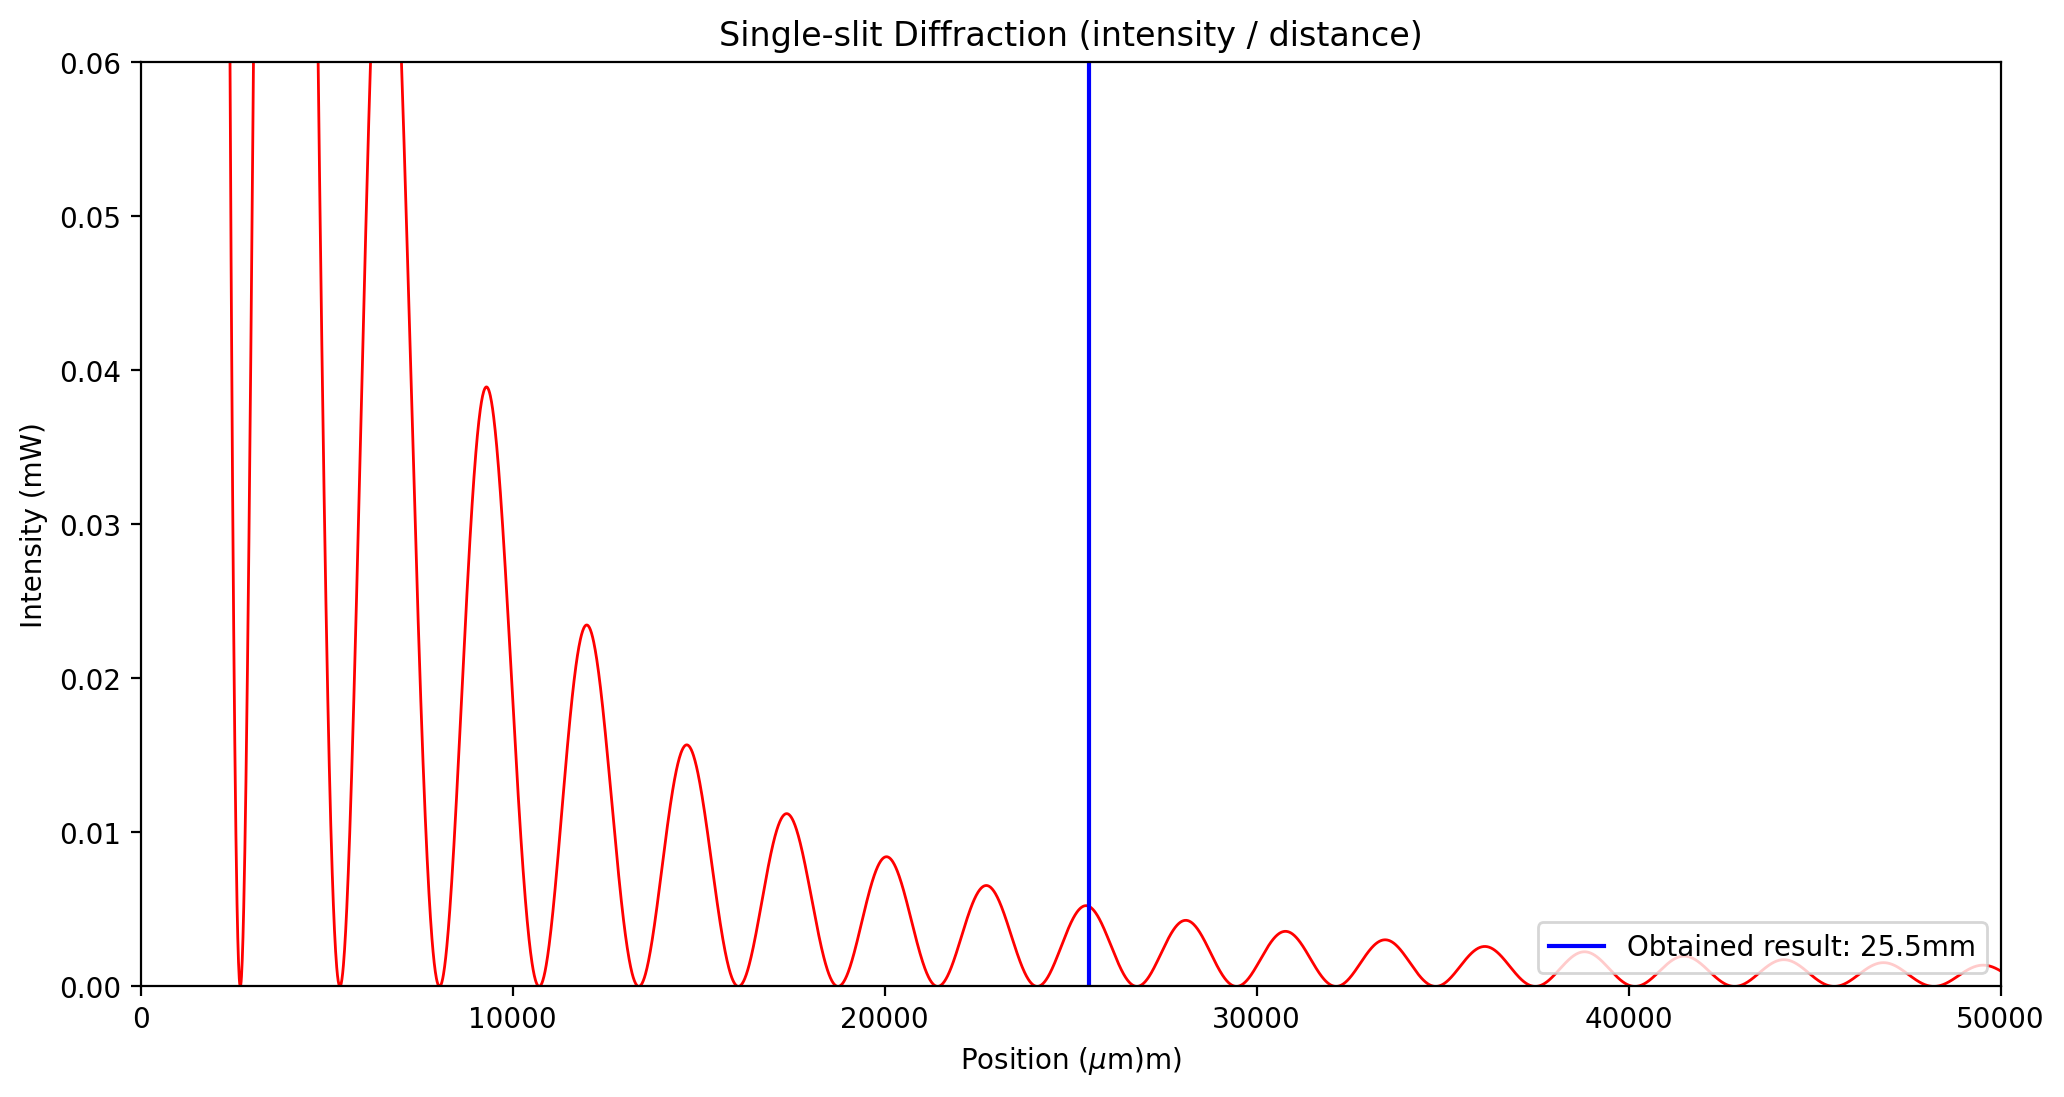

In [6]:
plt.figure(1, (12, 6))
plt.plot(x, intensity, linewidth=1, color='r') # red indicates the intensity
result = result_mm * 1000
plt.axvline(x = result, color='b', label="Obtained result: "+str(result_mm)+"mm") # blue indicated your result indicated earlier
plt.xlim((0, 50000))
plt.ylim((0, 0.06))
plt.xlabel(r'Position ($\mu$m)m)')
plt.ylabel(r'Intensity (mW)')
plt.legend(loc='lower right')
plt.title("Single-slit Diffraction (intensity / distance)")
plt.show()

# Angle between the Lines
Now, we will attempt to calculate the angle between the lines that form the X-shape. It corresponds to the *helix angle* on the spring.

The laser will illuminate one pitch (complete curl) of the spring.

**Babinet’s principle** states that the diffraction pattern of an obstacle is the same as the diffraction pattern of an aperture of the same shape. Hence, we will expect to see *two* single slit diffraction patterns angled to each other.

When viewed from the side, the spring (or any regular helix) resembles a sine wave. We also will make use of this property later on.

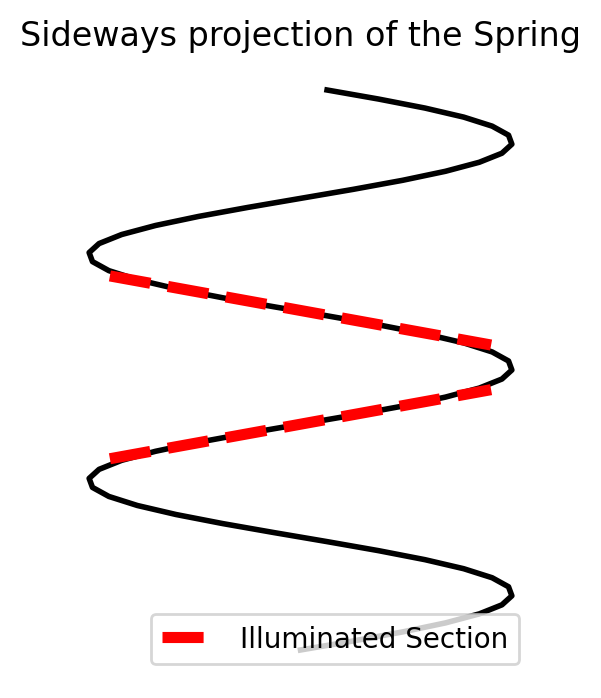

In [7]:
plt.figure(1, (3, 4))
t = np.arange(0, 2.5, 0.04)
s = np.sin(2*np.pi*t)
plt.plot(s, t, color='k', linewidth=2)
x_p = np.linspace(-0.9, 0.9, 3)
line1,  = plt.plot(x_p, 0.17*x_p + 1, '--', linewidth=4, color='r', label='Illuminated Section')
line2,  = plt.plot(x_p, -0.17*x_p + 0.98+np.pi/6, '--', linewidth=4, color='r')
plt.axis('off')
plt.legend(loc='lower right')
plt.title("Sideways projection of the Spring")
plt.show()

# 3. Fill In: Parameters of the Spring
Enter the dimensions of the spring below, measured with a pair of vernier calipers. The units here are given in **mm**.

In [8]:
'''
pitch_mm  = float(input("pitch_mm: "))
radius_mm = float(input("radius_mm: "))
'''
pitch_mm  = 2.5   # p
radius_mm = 2.05  # R

We orientate the spring in the $y-z$ plane to make it easier to work with.

The code below generates a graphical representation of your spring projected onto the $y-z$ plane.

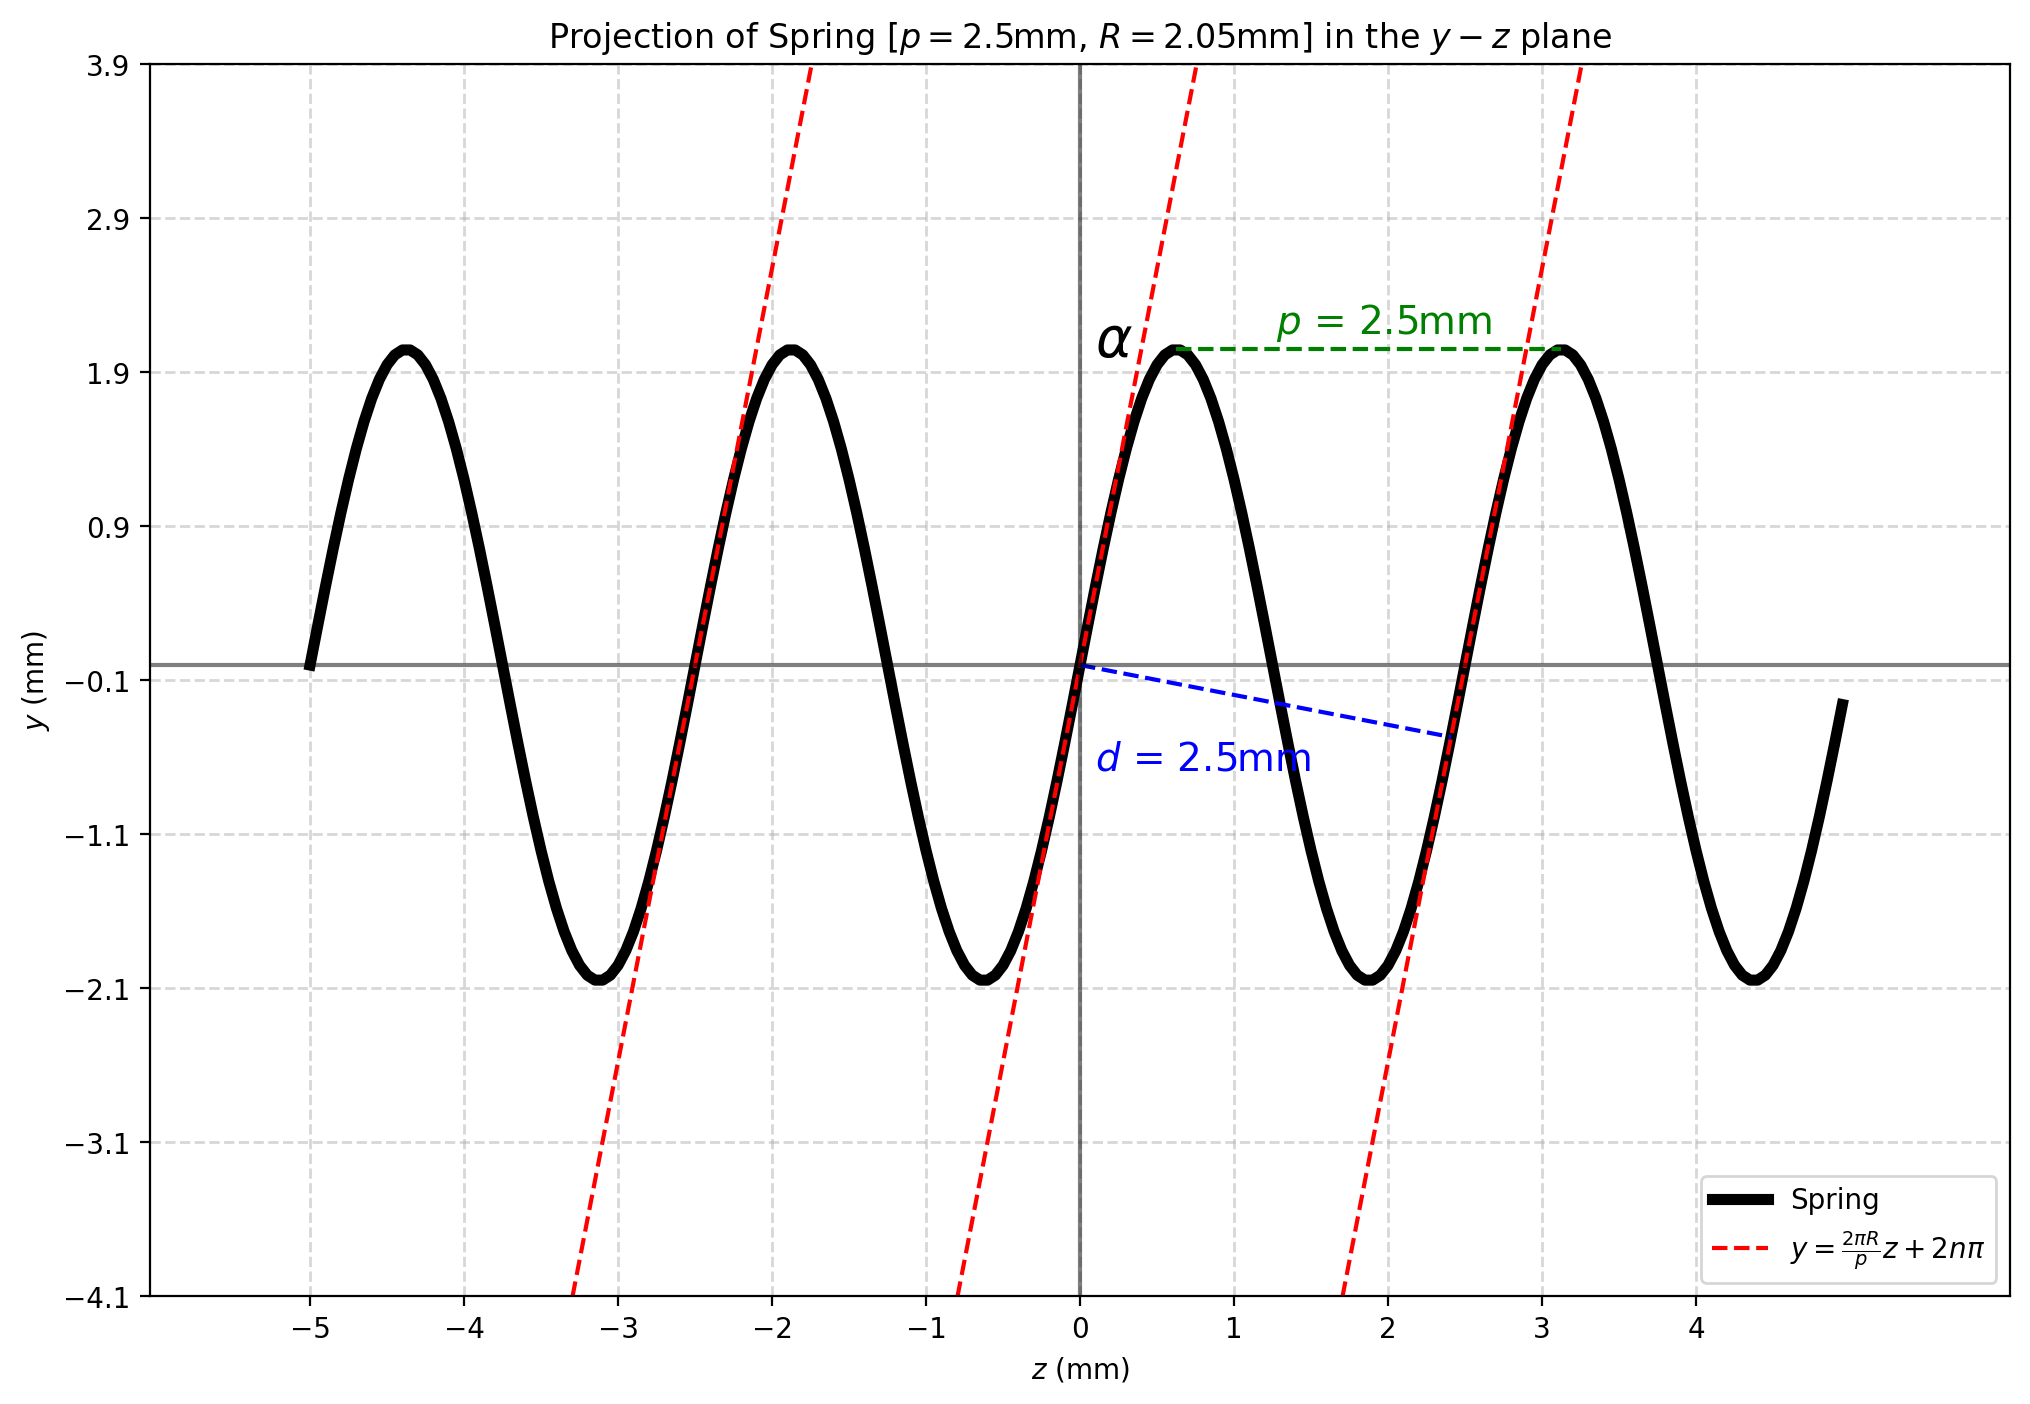

In [9]:
plt.figure(2, (12, 8))
z_q = np.arange(-2*pitch_mm, 2*pitch_mm, 0.05)
y_q = radius_mm * np.sin(2*np.pi * z_q/pitch_mm)
plt.plot(z_q, y_q, color = 'k', linewidth=4 , label='Spring')

y_1 = radius_mm * (2*np.pi * z_q/pitch_mm - 2*np.pi)
y_2 = radius_mm * (2*np.pi * z_q/pitch_mm)
y_3 = radius_mm * (2*np.pi * z_q/pitch_mm + 2*np.pi)

alpha = np.pi/2 - math.atan(radius_mm * 2*np.pi / pitch_mm)

plt.plot(z_q, y_1, "--", color='r', label = r'$y=\frac{2\pi R}{p}z+2n\pi$')
plt.plot(z_q, y_2, "--", color='r')
plt.plot(z_q, y_3, "--", color='r')

plt.text(0.1, 2, r'$\alpha$', fontsize=20)

d = pitch_mm*math.cos(alpha)
x_d2 = pitch_mm*(math.cos(alpha)**2)

x_d = np.linspace(0, x_d2, 3)
plt.plot(x_d, -1*(pitch_mm/(2*np.pi*radius_mm)) * x_d, "--", color='b')
plt.text(0.1, -radius_mm/3, "$d$ = " + str('%.1f'%d) + "mm", color="b", fontsize=14)

x_p1 = pitch_mm/4
x_p2 = x_p1 + pitch_mm
x_pitch = np.linspace(x_p1, x_p2, 3)
plt.plot(x_pitch, radius_mm + x_pitch*0, "--", color='g')
plt.text((x_p1+x_p2)/2-0.6, radius_mm + 0.1, "$p$ = " + str(pitch_mm) + "mm", color="g", fontsize=14)

plt.xlabel('$z$ (mm)')
plt.axvline(x=0, color='k', alpha=0.5)
plt.ylabel('$y$ (mm)')
plt.axhline(y=0, color='k', alpha=0.5)
plt.axis('equal')
plt.xlim((-2*pitch_mm, 2*pitch_mm))
plt.ylim((-radius_mm*1.2, radius_mm*1.2))
plt.legend(loc='lower right')
ax = plt.gca()
ax.set_xticks(np.arange(-2*pitch_mm, 2*pitch_mm, 1))
ax.set_yticks(np.arange(-radius_mm*2, radius_mm*2, 1))
plt.grid(True, linestyle='--', linewidth=1, alpha=0.5)
plt.title(r"Projection of Spring [$p=$"+str(pitch_mm)+r"mm, $R=$"+str(radius_mm)+r"mm] in the $y-z$ plane")
plt.show()

Perform some symbolic differentiation on the equation of the spring:

In [10]:
from sympy import *
init_printing()
R, p, z = symbols('R p z')
eqn_y = R * sin(2 * pi * z / p)
eqn_y.simplify()

     ⎛2⋅π⋅z⎞
R⋅sin⎜─────⎟
     ⎝  p  ⎠

In [11]:
n = symbols('n', integer=True)
deriv_y = diff(eqn_y, z)
deriv_y.simplify()

         ⎛2⋅π⋅z⎞
2⋅π⋅R⋅cos⎜─────⎟
         ⎝  p  ⎠
────────────────
       p        

Substitute $z=n \times p$:

In [12]:
deriv_y = deriv_y.subs(z, n*p) #z = n*p
deriv_y.simplify()

2⋅π⋅R
─────
  p  

The angle $\alpha$ is equal to the following expression:

In [13]:
eqn_a = -1 * atan(deriv_y) + pi/2
eqn_a.simplify()

      ⎛2⋅π⋅R⎞   π
- atan⎜─────⎟ + ─
      ⎝  p  ⎠   2

In [15]:
deriv_y = deriv_y.subs(p, pitch_mm * 10**-3)
deriv_y = deriv_y.subs(R, radius_mm * 10**-3)
a = -1 * math.atan(deriv_y) + math.pi/2
print(r'The angle(α) between the lines is '
      + str('%.3f'%(math.degrees(a)) + " degrees (to 3dp)."))

The angle(α) between the lines is 10.984 degrees (to 3dp).


# Visualising the Actual Diffraction Pattern
Now that we have the angle and the intensity, we can attempt to visualise the pattern seen.

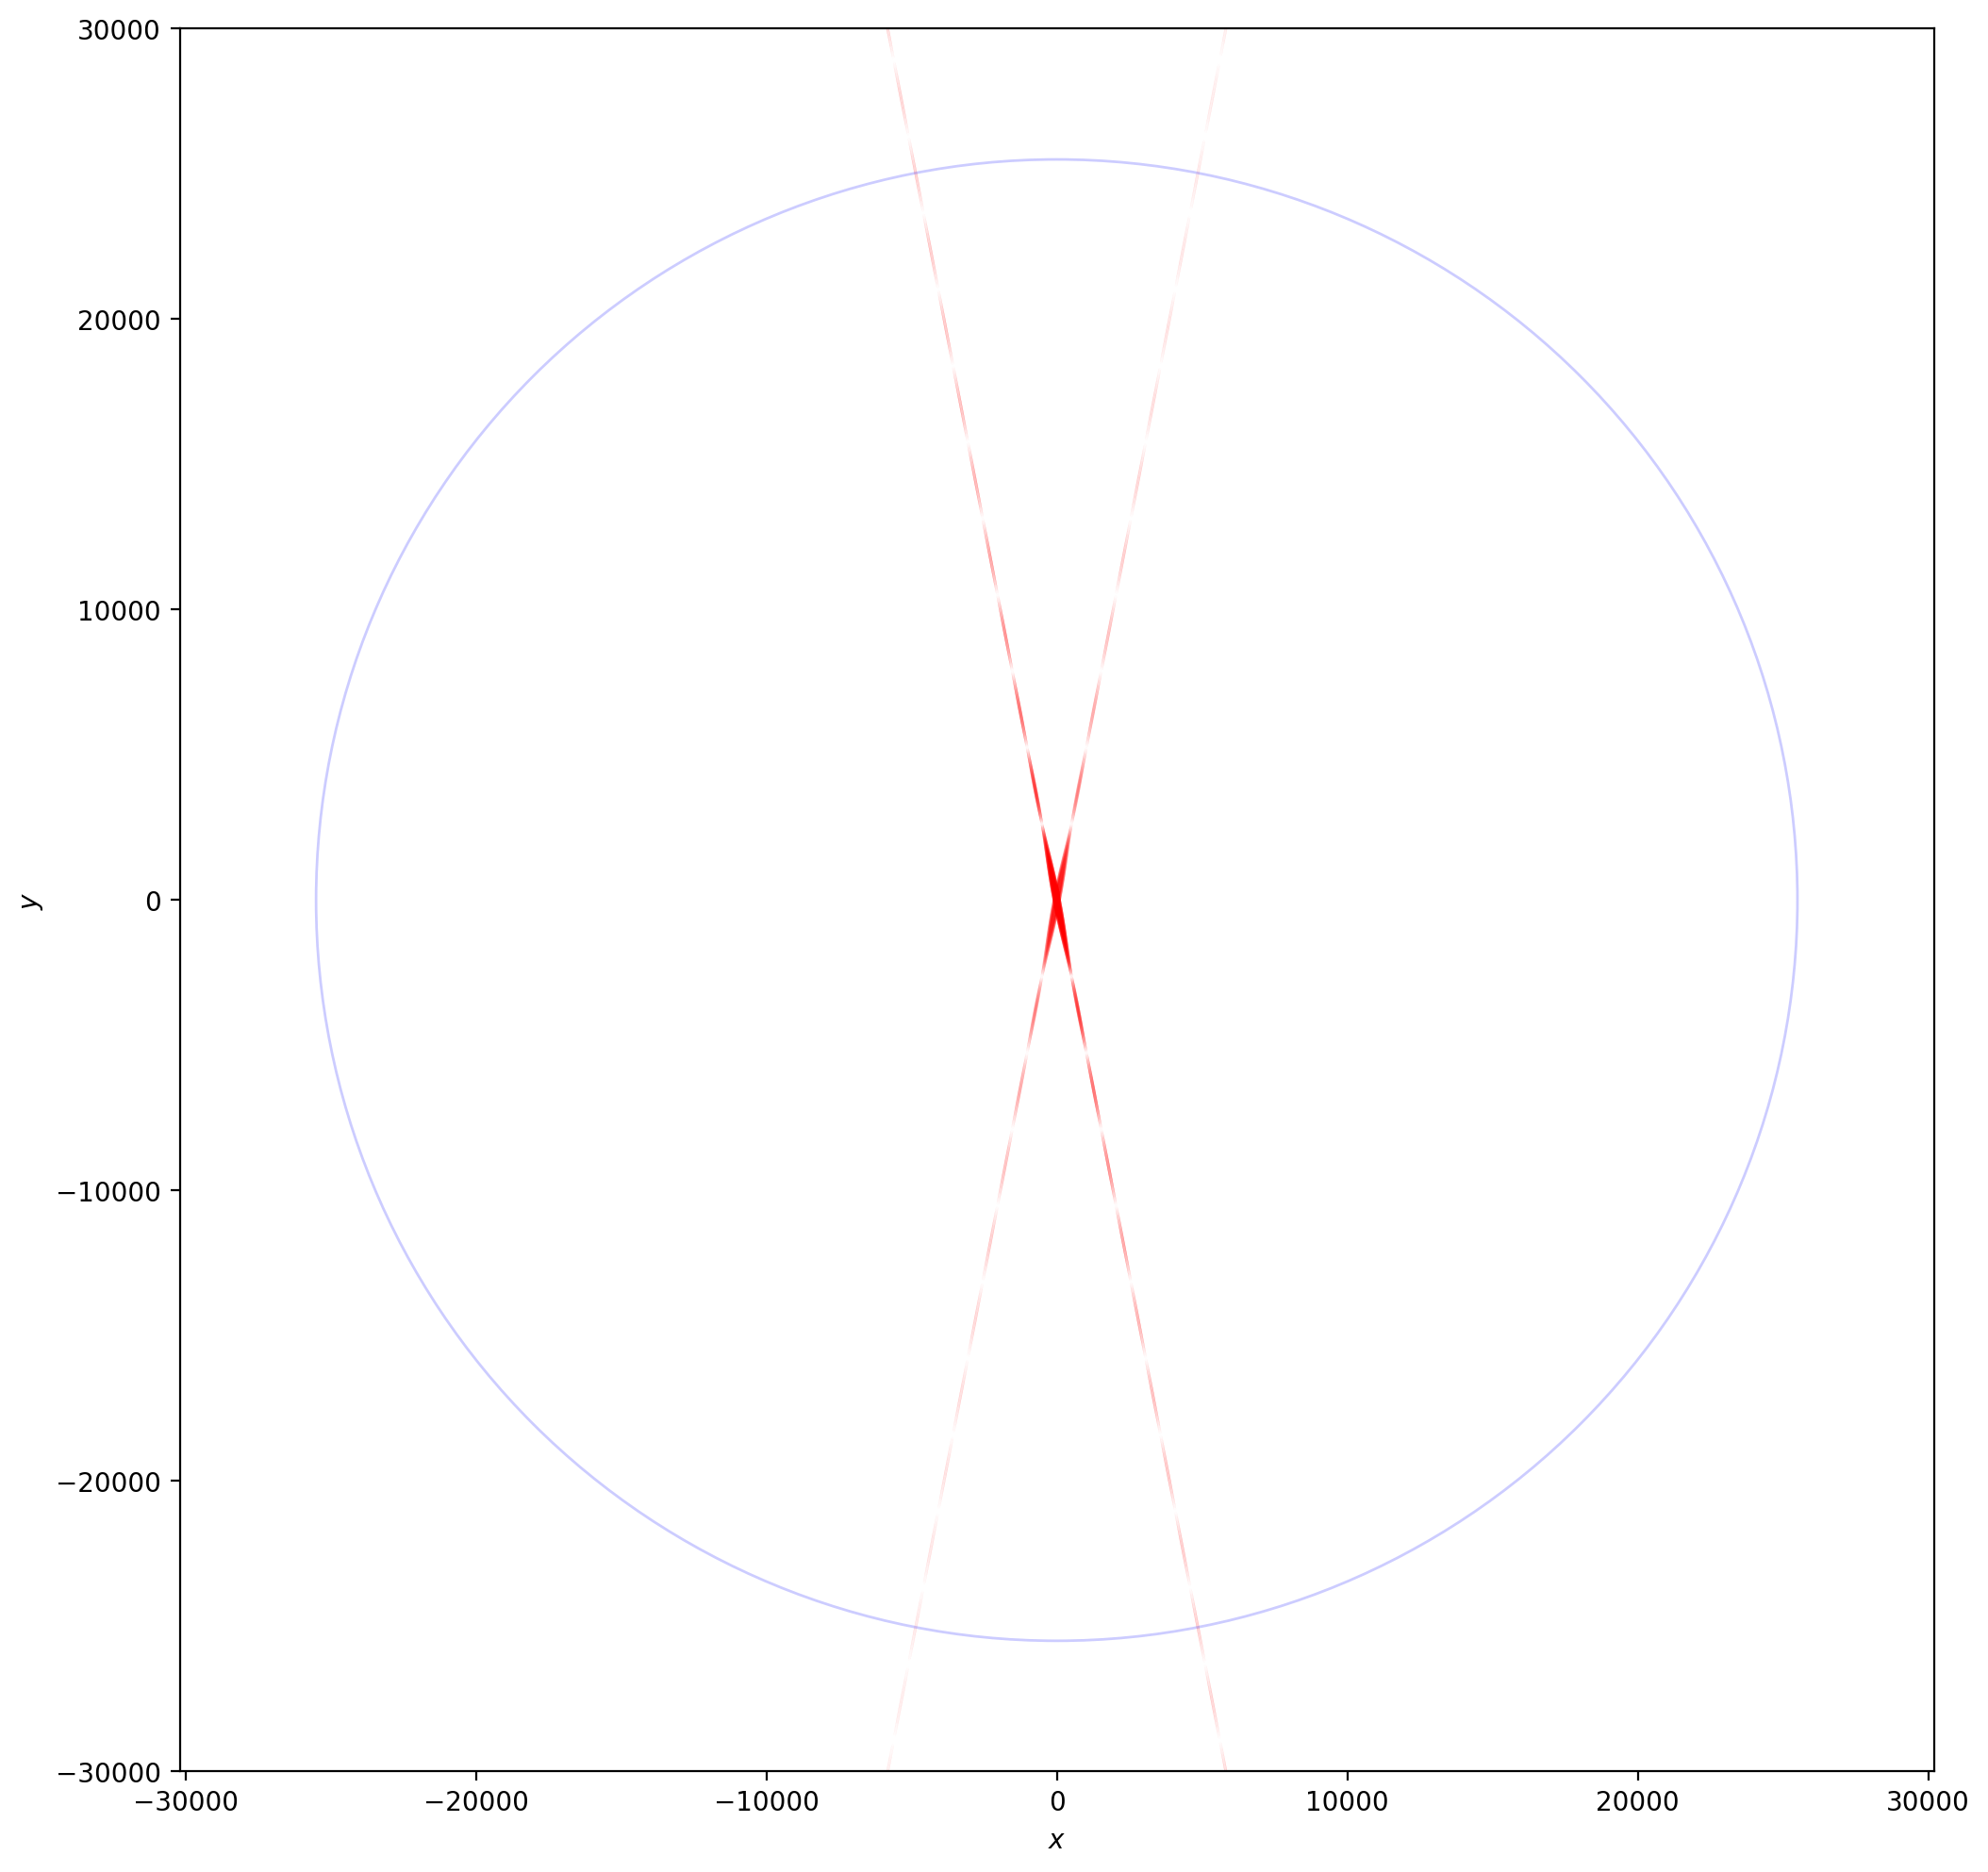

In [16]:
angle = math.pi/2 - a

plt.figure(3, (12, 12))

# transform the intensity line by rotating it about the center
x_tf = ( x / math.sqrt((math.tan(angle))**2 + 1) )
y_tf = x_tf * math.tan(angle)
plt.scatter(x_tf, y_tf, color='r', s=intensity, alpha=0.05) # plot the first line

y_tf = x_tf * math.tan(-angle)
plt.scatter(x_tf, y_tf, color='r', s=intensity, alpha=0.1) # plot the second line

# plot the circle which marks our result from earlier (gray)
ax = plt.gca()
circle_result = plt.Circle((0, 0), result, color='b', fill=False, alpha=0.2)
ax.add_artist(circle_result)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis('equal')
plt.xlim((-30000, 30000))
plt.ylim((-30000, 30000))
plt.show()

#### Zoomed in version
This is a close-up look at the first quadrant of the above figure.

It allows us to properly judge the maxima that might not be obvious above.

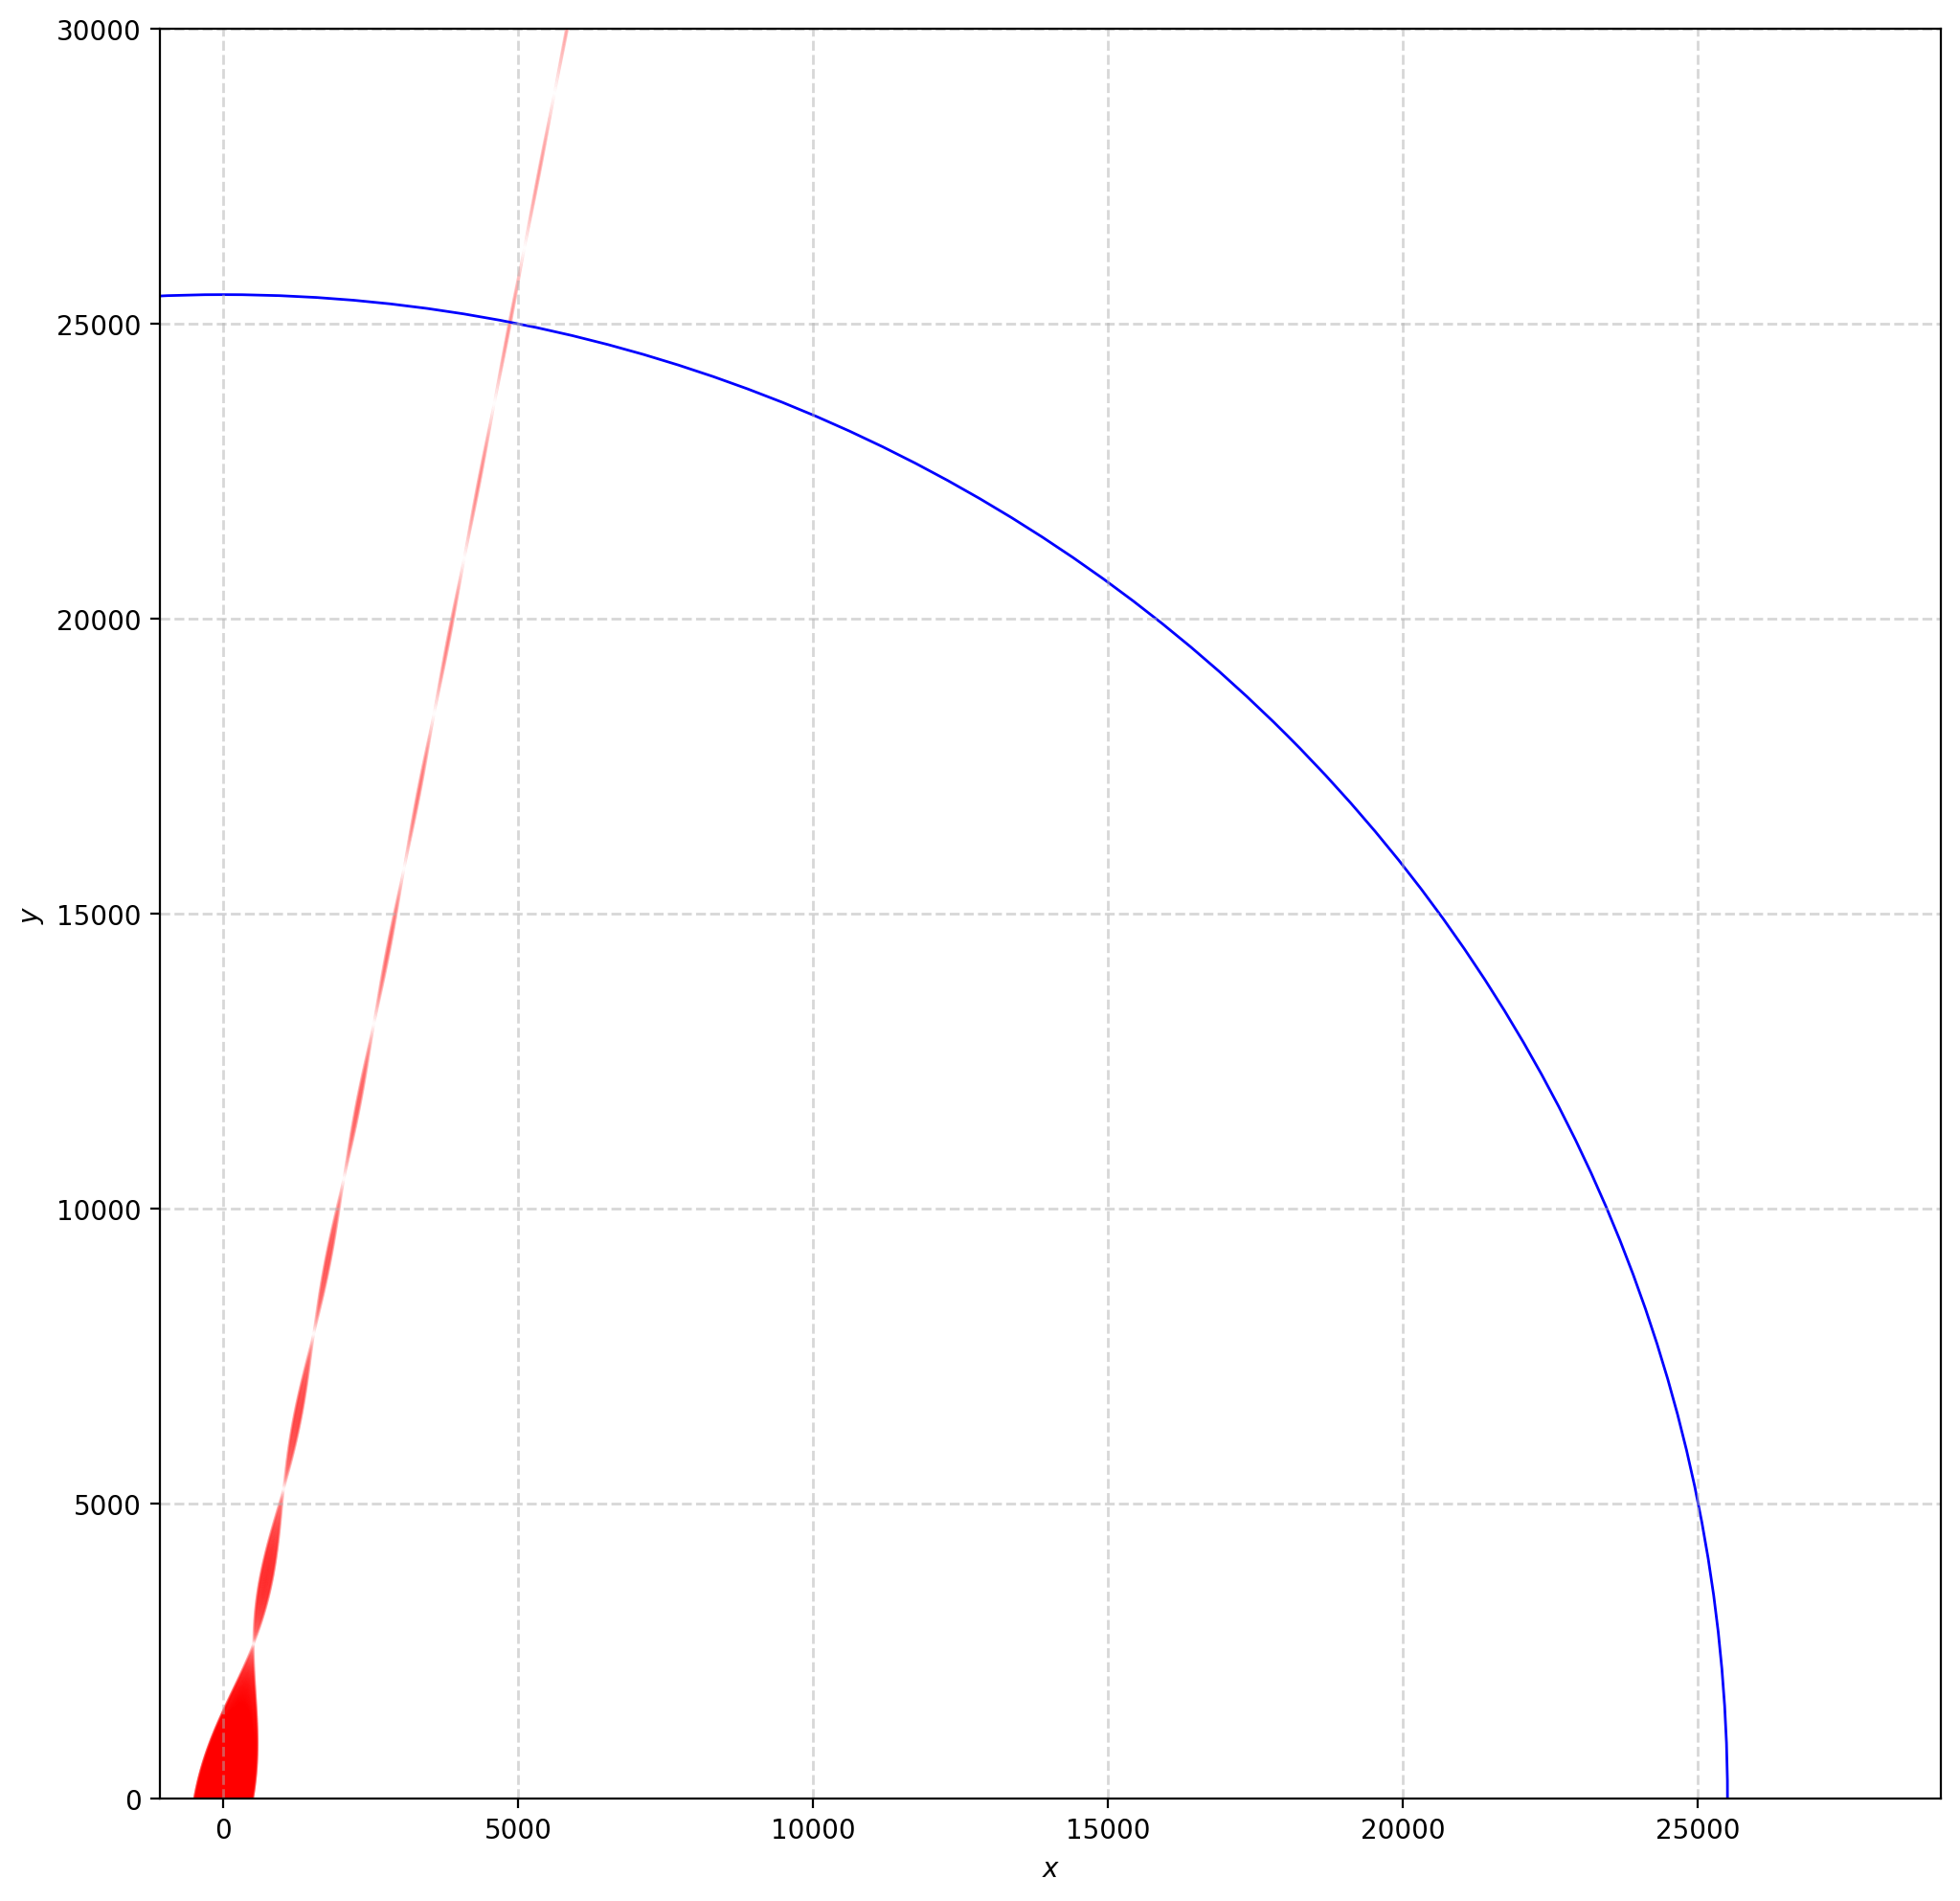

In [17]:
plt.figure(4, (12, 12))

x_tf = ( x / math.sqrt((math.tan(angle))**2 + 1) )
y_tf = x_tf * math.tan(angle)
plt.scatter(x_tf, y_tf, color='r', s=intensity*100, alpha=0.05)

# circle which marks the result (blue)
ax = plt.gca()
circle_result = plt.Circle((0, 0), result, color='b', fill=False)
ax.add_artist(circle_result)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axis('equal')
plt.xlim((0, 1.1*result))
plt.ylim((0, 30000))
plt.grid(True, linestyle='--', linewidth=1, alpha=0.5)
plt.show()

# Significance of this Result
![Photo 51](photo51.jpg)
**Photograph 51** is the nickname given to an X-ray diffraction image of DNA taken by Raymond Gosling in May 1952, working as a PhD student under the supervision of Rosalind Franklin.

Does it not resemble the result you have gotten from the pen spring?

Since objects of similar shape produce similar diffraction patterns (Babinet's principle), this result was critical evidence in identifying the structure of DNA as a regular helix.

In [18]:
import os
print(os.popen("cowsay 'Can MatLab do this?'").read())